In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
heart_failure = pd.read_csv('../datasets/heart_failure.csv')

In [3]:
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
from sklearn.preprocessing import StandardScaler 

In [6]:
X = heart_failure.drop('DEATH_EVENT', axis=1)
y = heart_failure['DEATH_EVENT']

In [7]:
heart_failure['DEATH_EVENT'].value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state=42)

In [9]:
y_test.value_counts(normalize=True)

0    0.683333
1    0.316667
Name: DEATH_EVENT, dtype: float64

In [16]:
# ss = StandardScaler()

In [17]:
# x_train_std = ss.fit_transform(x_train)

In [18]:
# x_test_std = ss.transform(x_test)

In [11]:
model = LogisticRegression(max_iter=5000)

In [12]:
kf = KFold(n_splits=30, shuffle=True, random_state=42)

In [13]:
results_cv = cross_validate(estimator=model, X=X, y=y,
                           cv=kf, scoring="accuracy",
                           return_train_score=True, return_estimator=True)

In [14]:
resultados = pd.DataFrame(results_cv)

In [15]:
resultados.describe()

,fit_time,score_time,test_score,train_score
count,30.000000,30.000000,30.000000,30.000000
mean,0.029113,0.001879,0.818889,0.825279
std,0.009816,0.000527,0.155039,0.006416
min,0.020499,0.000553,0.500000,0.816609
25%,0.023128,0.001609,0.700000,0.820934
50%,0.026599,0.001995,0.850000,0.823529
75%,0.031852,0.001998,0.900000,0.827437
max,0.069673,0.003010,1.000000,0.840830


In [18]:
breast_cancer = pd.read_csv('../datasets/breast_cancer.csv')

In [19]:
breast_cancer = breast_cancer.drop(columns=['id'], axis=1)

In [20]:
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

In [21]:
scaler = StandardScaler()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=42)

In [23]:
x_train_std = scaler.fit_transform(x_train)

In [24]:
x_test_std = scaler.transform(x_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [27]:
knc =KNeighborsClassifier(n_neighbors=9, metric='manhattan')

In [28]:
knc.fit(x_train_std, y_train)
# Utilizamos o fit pra "ajustar" os dados que possuímos e fazer com que fiquem em uma escala parecida e não influenciem com o valor do seu módulo

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [29]:
y_pred = knc.predict(x_test_std)

C:\Users\thiag\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
mc = confusion_matrix(y_test, y_pred)

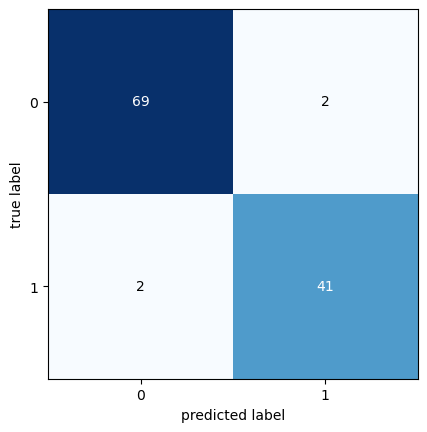

In [31]:
plot_confusion_matrix(conf_mat=mc)
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

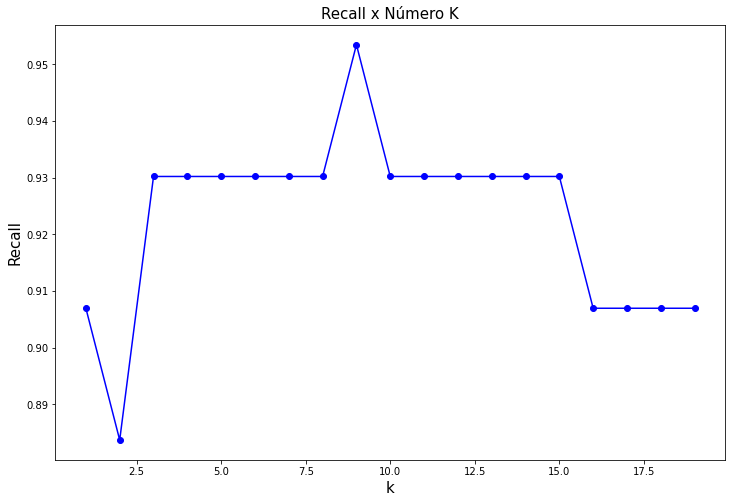

Melhor k: 9


In [86]:
from sklearn.metrics import recall_score
import numpy as np

ks = []
recalls = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_test_std)
    rec = recall_score(y_test, y_pred, pos_label='M')
    recalls.append(rec)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, recalls, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Recall', fontsize = 15)
plt.title('Recall x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(recalls)+1
print('Melhor k:', best_k)

In [97]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [34]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [69]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [40]:
penguins.info()
# Podemos ver que há algumas poucas linhas com dados nulos.
# Como são poucas, vamos apenas retirá-las da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [70]:
penguins_cleaned = penguins.dropna()
penguins_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [82]:
X = penguins_cleaned.drop(['island', 'sex', 'species'], axis=1) #Removendo os campos textuais e o campo 'alvo'
y = penguins_cleaned['species']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify = y)

In [84]:
scaler = StandardScaler()

In [89]:
x_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.transform(X_test)

C:\Users\thiag\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\thiag\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

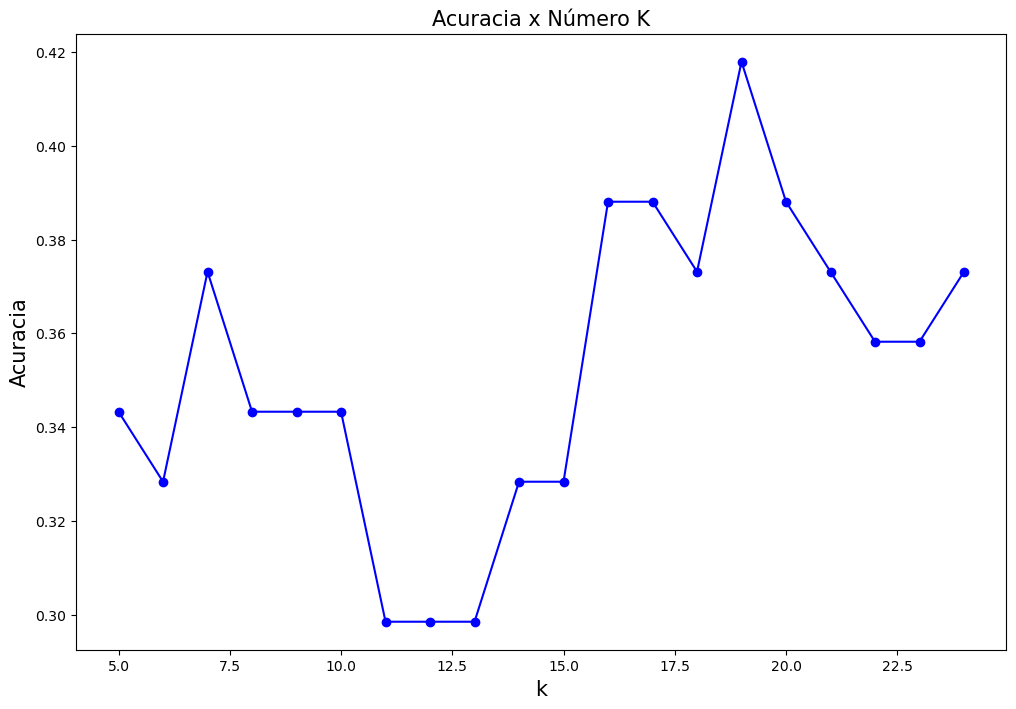

Melhor k: 19


In [92]:
# Código padrão para escolha do número de k
# ACCURACY

from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

ks = []
accuracys = []
for k in range(5, 25):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_test_std)
    acc = accuracy_score(y_test, y_pred)
    accuracys.append(acc)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, accuracys, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.title('Acuracia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracys)+5
print('Melhor k:', best_k)